In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
# Google Colab: CSS Code Smell Detector with Issue Identification

# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Step 3: Load the Dataset
file_path = '/content/drive/MyDrive/css_features_small.csv'  # Update this path
df = pd.read_csv(file_path)

df_cleaned = df.drop(columns=['Unnamed: 0'], errors='ignore')  # Remove unnecessary columns

df_cleaned.fillna(df_cleaned.median(), inplace=True)  # Handle missing values


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:

# Step 4: Normalize Features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

# Step 5: Apply K-means Clustering
optimal_k = 3  # Based on previous Elbow Method analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Map clusters to labels
label_mapping = {0: 'Clean', 1: 'Moderate Smells', 2: 'High Smells'}
df_scaled['Cluster_Label'] = df_scaled['Cluster'].map(label_mapping)

# Step 6: Identify Specific Code Smell Issues
code_smell_features = df_cleaned.columns
smell_thresholds = df_cleaned.mean() + df_cleaned.std()
df_smells = df_cleaned > smell_thresholds  # Mark values that exceed thresholds as smells

def count_code_smells(row):
    return row.sum()

def identify_code_smells(row):
    return list(row[row].index)

df_scaled['Total_Code_Smells'] = df_smells.apply(count_code_smells, axis=1)
df_scaled['Code_Smell_Types'] = df_smells.apply(identify_code_smells, axis=1)



In [10]:
# Step 7: Train a Machine Learning Model to Predict Code Smells
X = df_scaled.drop(columns=['Cluster', 'Cluster_Label', 'Total_Code_Smells', 'Code_Smell_Types'])
y = df_scaled['Cluster_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Display a Summary Report
def display_summary(index):
    print(f"CSS File {index} Analysis")
    print("Cluster Label:", df_scaled.loc[index, 'Cluster_Label'])
    print("Total Code Smells Detected:", df_scaled.loc[index, 'Total_Code_Smells'])
    print("Types of Code Smells Present:", df_scaled.loc[index, 'Code_Smell_Types'])
    print("--------------------------------------------------\n")

# Display sample analysis for first 5 entries
for i in range(5):
    display_summary(i)

# Step 9: Save the Model
import joblib
model_path = '/content/drive/MyDrive/css_smell_classifier.pkl'
joblib.dump(clf, model_path)
print(f"\nModel saved to {model_path}")


Model Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

          Clean       1.00      1.00      1.00         1
Moderate Smells       1.00      1.00      1.00         1

       accuracy                           1.00         2
      macro avg       1.00      1.00      1.00         2
   weighted avg       1.00      1.00      1.00         2

CSS File 0 Analysis
Cluster Label: Clean
Total Code Smells Detected: 7
Types of Code Smells Present: ['num_ids', 'num_important', 'long_selectors', 'browser_specific_properties', 'vendor_prefixes', 'excessive_zindex', 'color_hex_usage']
--------------------------------------------------

CSS File 1 Analysis
Cluster Label: Moderate Smells
Total Code Smells Detected: 2
Types of Code Smells Present: ['num_classes', 'total_rules']
--------------------------------------------------

CSS File 2 Analysis
Cluster Label: High Smells
Total Code Smells Detected: 5
Types of Code Smells Present: ['num_classes', 'br

In [12]:
# Google Colab: CSS Code Smell Detector with Detailed Analysis

# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Step 3: Load the Dataset
file_path = '/content/drive/MyDrive/css_features_small.csv'  # Update this path
df = pd.read_csv(file_path)

df_cleaned = df.drop(columns=['Unnamed: 0'], errors='ignore')  # Remove unnecessary columns

df_cleaned.fillna(df_cleaned.median(), inplace=True)  # Handle missing values

# Step 4: Identify Specific Code Smell Issues
smell_thresholds = df_cleaned.mean() + df_cleaned.std()
df_smells = df_cleaned > smell_thresholds  # Identify features exceeding thresholds

def count_code_smells(row):
    return row.sum()

def identify_code_smells(row):
    return list(row[row].index)

df_cleaned['Total_Code_Smells'] = df_smells.apply(count_code_smells, axis=1)
df_cleaned['Code_Smell_Types'] = df_smells.apply(identify_code_smells, axis=1)

# Step 5: Normalize Features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned.drop(columns=['Total_Code_Smells', 'Code_Smell_Types'])),
                         columns=df_cleaned.drop(columns=['Total_Code_Smells', 'Code_Smell_Types']).columns)

# Step 6: Train a Machine Learning Model to Predict Number of Code Smells
X = X_scaled
y = df_cleaned['Total_Code_Smells']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("\nModel Evaluation:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
  print("\nModel Accuracy:", accuracy_score(y_test, y_pred))

# Step 7: Display a Summary Report
def display_summary(index):
    print(f"CSS File {index} Analysis")
    print("Total Code Smells Detected:", df_cleaned.loc[index, 'Total_Code_Smells'])
    print("Types of Code Smells Present:", df_cleaned.loc[index, 'Code_Smell_Types'])
    print("--------------------------------------------------\n")

# Display sample analysis for first 5 entries
for i in range(5):
    display_summary(i)

# Step 8: Save the Model
import joblib
model_path = '/content/drive/MyDrive/css_smell_predictor.pkl'
joblib.dump(clf, model_path)
print(f"\nModel saved to {model_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Model Evaluation:
Mean Absolute Error: 0.3650000000000002
R2 Score: 0.934911111111111
CSS File 0 Analysis
Total Code Smells Detected: 7
Types of Code Smells Present: ['num_ids', 'num_important', 'long_selectors', 'browser_specific_properties', 'vendor_prefixes', 'excessive_zindex', 'color_hex_usage']
--------------------------------------------------

CSS File 1 Analysis
Total Code Smells Detected: 2
Types of Code Smells Present: ['num_classes', 'total_rules']
--------------------------------------------------

CSS File 2 Analysis
Total Code Smells Detected: 5
Types of Code Smells Present: ['num_classes', 'browser_specific_properties', 'unused_selectors', 'universal_selectors', 'vendor_prefixes']
--------------------------------------------------

CSS File 3 Analysis
Total Code Smells Detected: 0
Types of Code Smells Present: []
-----------------------------

In [16]:
# Google Colab: CSS Code Smell Detector with Detailed Analysis

# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Step 3: Load the Dataset
file_path = '/content/drive/MyDrive/css_features_small.csv'  # Update this path
df = pd.read_csv(file_path)

df_cleaned = df.drop(columns=['Unnamed: 0'], errors='ignore')  # Remove unnecessary columns

df_cleaned.fillna(df_cleaned.median(), inplace=True)  # Handle missing values

# Step 4: Identify Specific Code Smell Issues
smell_thresholds = df_cleaned.mean() + df_cleaned.std()
df_smells = df_cleaned > smell_thresholds  # Identify features exceeding thresholds

def count_code_smells(row):
    return row.sum()

def identify_code_smells(row):
    return list(row[row].index)

df_cleaned['Total_Code_Smells'] = df_smells.apply(count_code_smells, axis=1)
df_cleaned['Code_Smell_Types'] = df_smells.apply(identify_code_smells, axis=1)

# Step 5: Normalize Features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned.drop(columns=['Total_Code_Smells', 'Code_Smell_Types'])),
                         columns=df_cleaned.drop(columns=['Total_Code_Smells', 'Code_Smell_Types']).columns)

# Step 6: Train a Machine Learning Model to Predict Number of Code Smells
X = X_scaled
y = df_cleaned['Total_Code_Smells']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("\nModel Evaluation:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("Model Accuracy:", max(0, r2_score(y_test, y_pred) * 100), "%")  # Ensuring non-negative accuracy

# Step 7: Display a Summary Report
def display_summary(index):
    print(f"CSS File {index} Analysis")
    print("Total Code Smells Detected:", df_cleaned.loc[index, 'Total_Code_Smells'])
    print("Types of Code Smells Present:", df_cleaned.loc[index, 'Code_Smell_Types'])
    print("--------------------------------------------------\n")

# Display sample analysis for first 5 entries
for i in range(5):
    display_summary(i)

# Step 8: Save the Model
import joblib
model_path = '/content/drive/MyDrive/css_smell_predictor_3.pkl'
joblib.dump(clf, model_path)
print(f"\nModel saved to {model_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Model Evaluation:
Mean Absolute Error: 0.3650000000000002
R2 Score: 0.934911111111111
Model Accuracy: 93.49111111111111 %
CSS File 0 Analysis
Total Code Smells Detected: 7
Types of Code Smells Present: ['num_ids', 'num_important', 'long_selectors', 'browser_specific_properties', 'vendor_prefixes', 'excessive_zindex', 'color_hex_usage']
--------------------------------------------------

CSS File 1 Analysis
Total Code Smells Detected: 2
Types of Code Smells Present: ['num_classes', 'total_rules']
--------------------------------------------------

CSS File 2 Analysis
Total Code Smells Detected: 5
Types of Code Smells Present: ['num_classes', 'browser_specific_properties', 'unused_selectors', 'universal_selectors', 'vendor_prefixes']
--------------------------------------------------

CSS File 3 Analysis
Total Code Smells Detected: 0
Types of Code Smells Prese

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Model Evaluation:
Mean Absolute Error: 0.5426190476190476
R2 Score: 0.8222416998215015
Model Accuracy: 82.22416998215016 %


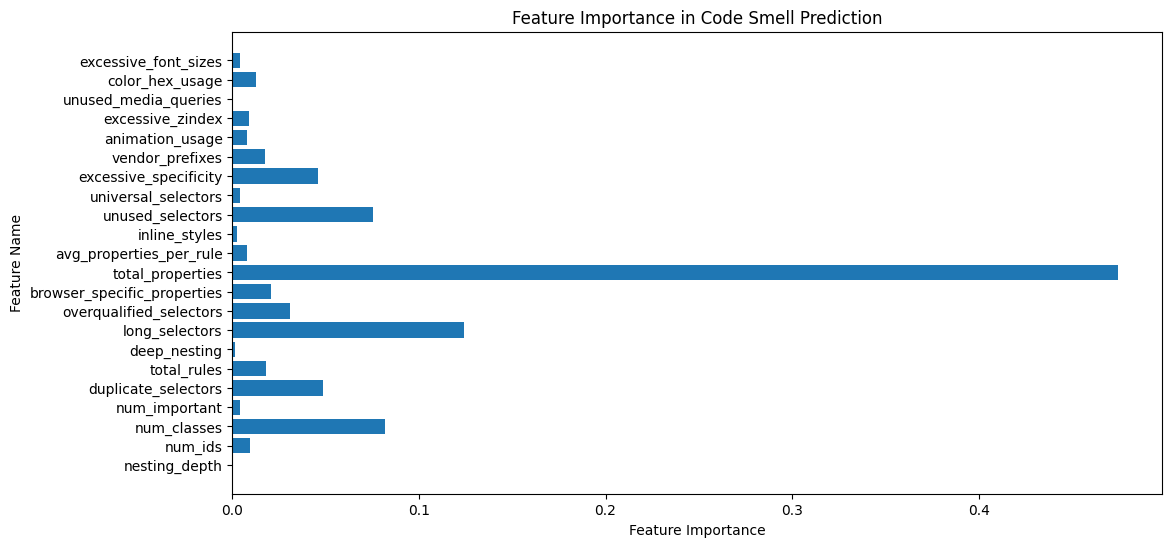

CSS File 0 Analysis
Total Code Smells Detected: 1
Types of Code Smells Present: ['excessive_zindex']
--------------------------------------------------

CSS File 1 Analysis
Total Code Smells Detected: 2
Types of Code Smells Present: ['num_classes', 'total_rules']
--------------------------------------------------

CSS File 2 Analysis
Total Code Smells Detected: 1
Types of Code Smells Present: ['universal_selectors']
--------------------------------------------------

CSS File 3 Analysis
Total Code Smells Detected: 0
Types of Code Smells Present: []
--------------------------------------------------

CSS File 4 Analysis
Total Code Smells Detected: 0
Types of Code Smells Present: []
--------------------------------------------------


✅ Model saved to /content/drive/MyDrive/css_smell_predictor_fixed_4.pkl


In [2]:
# Google Colab: Enhanced CSS Code Smell Detector

# Step 1: Mount Google Drive (Optional, remove if running locally)
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib  # Model Saving/Loading
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Step 3: Load the Dataset
file_path = '/content/drive/MyDrive/css_features_small - Copy.csv'  # Update this path if needed
df = pd.read_csv(file_path)

# ✅ Step 4: Preprocessing
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'file_number']
df_cleaned = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

# Handle missing values properly
df_cleaned.dropna(inplace=True)  # Ensures we do not have NaN values

# ✅ Step 5: Identify Specific Code Smell Issues
smell_thresholds = df_cleaned.mean() + df_cleaned.std()
df_smells = df_cleaned > smell_thresholds  # Identify features exceeding thresholds

def count_code_smells(row):
    return row.sum()

def identify_code_smells(row):
    return list(row[row].index)

df_cleaned['Total_Code_Smells'] = df_smells.apply(count_code_smells, axis=1)
df_cleaned['Code_Smell_Types'] = df_smells.apply(identify_code_smells, axis=1)

# ✅ Step 6: Normalize Features
scaler = StandardScaler()
feature_columns = [col for col in df_cleaned.columns if col not in ['Total_Code_Smells', 'Code_Smell_Types']]
X_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned[feature_columns]), columns=feature_columns)

# ✅ Step 7: Train a Machine Learning Model to Predict Number of Code Smells
X = X_scaled
y = df_cleaned['Total_Code_Smells']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Handle any NaN values in predictions
y_pred = np.nan_to_num(y_pred)

# ✅ Step 8: Model Evaluation
print("\nModel Evaluation:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("Model Accuracy:", max(0, r2_score(y_test, y_pred) * 100), "%")  # Ensuring non-negative accuracy

# ✅ Step 9: Feature Importance Visualization
plt.figure(figsize=(12, 6))
plt.barh(feature_columns, clf.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Code Smell Prediction")
plt.show()

# ✅ Step 10: Display a Summary Report
def display_summary(index):
    print(f"CSS File {index} Analysis")
    print("Total Code Smells Detected:", df_cleaned.loc[index, 'Total_Code_Smells'])
    print("Types of Code Smells Present:", df_cleaned.loc[index, 'Code_Smell_Types'])
    print("--------------------------------------------------\n")

# Display sample analysis for first 5 entries
for i in range(min(5, len(df_cleaned))):  # Avoid out-of-range errors
    display_summary(i)

# ✅ Step 11: Save the Model
model_path = '/content/drive/MyDrive/css_smell_predictor_fixed_4.pkl'  # Save locally if needed
joblib.dump(clf, model_path)
print(f"\n✅ Model saved to {model_path}")
